## In this task, I'm finding two dominant colors in an image.
1. First approach: Finding two dominat colors in an image using pillow library.
2. Second and third approach: Finding two dominat colors in an image using opencv and Kmeans clustering.

## Importing pillow library

In [2]:
from PIL import Image

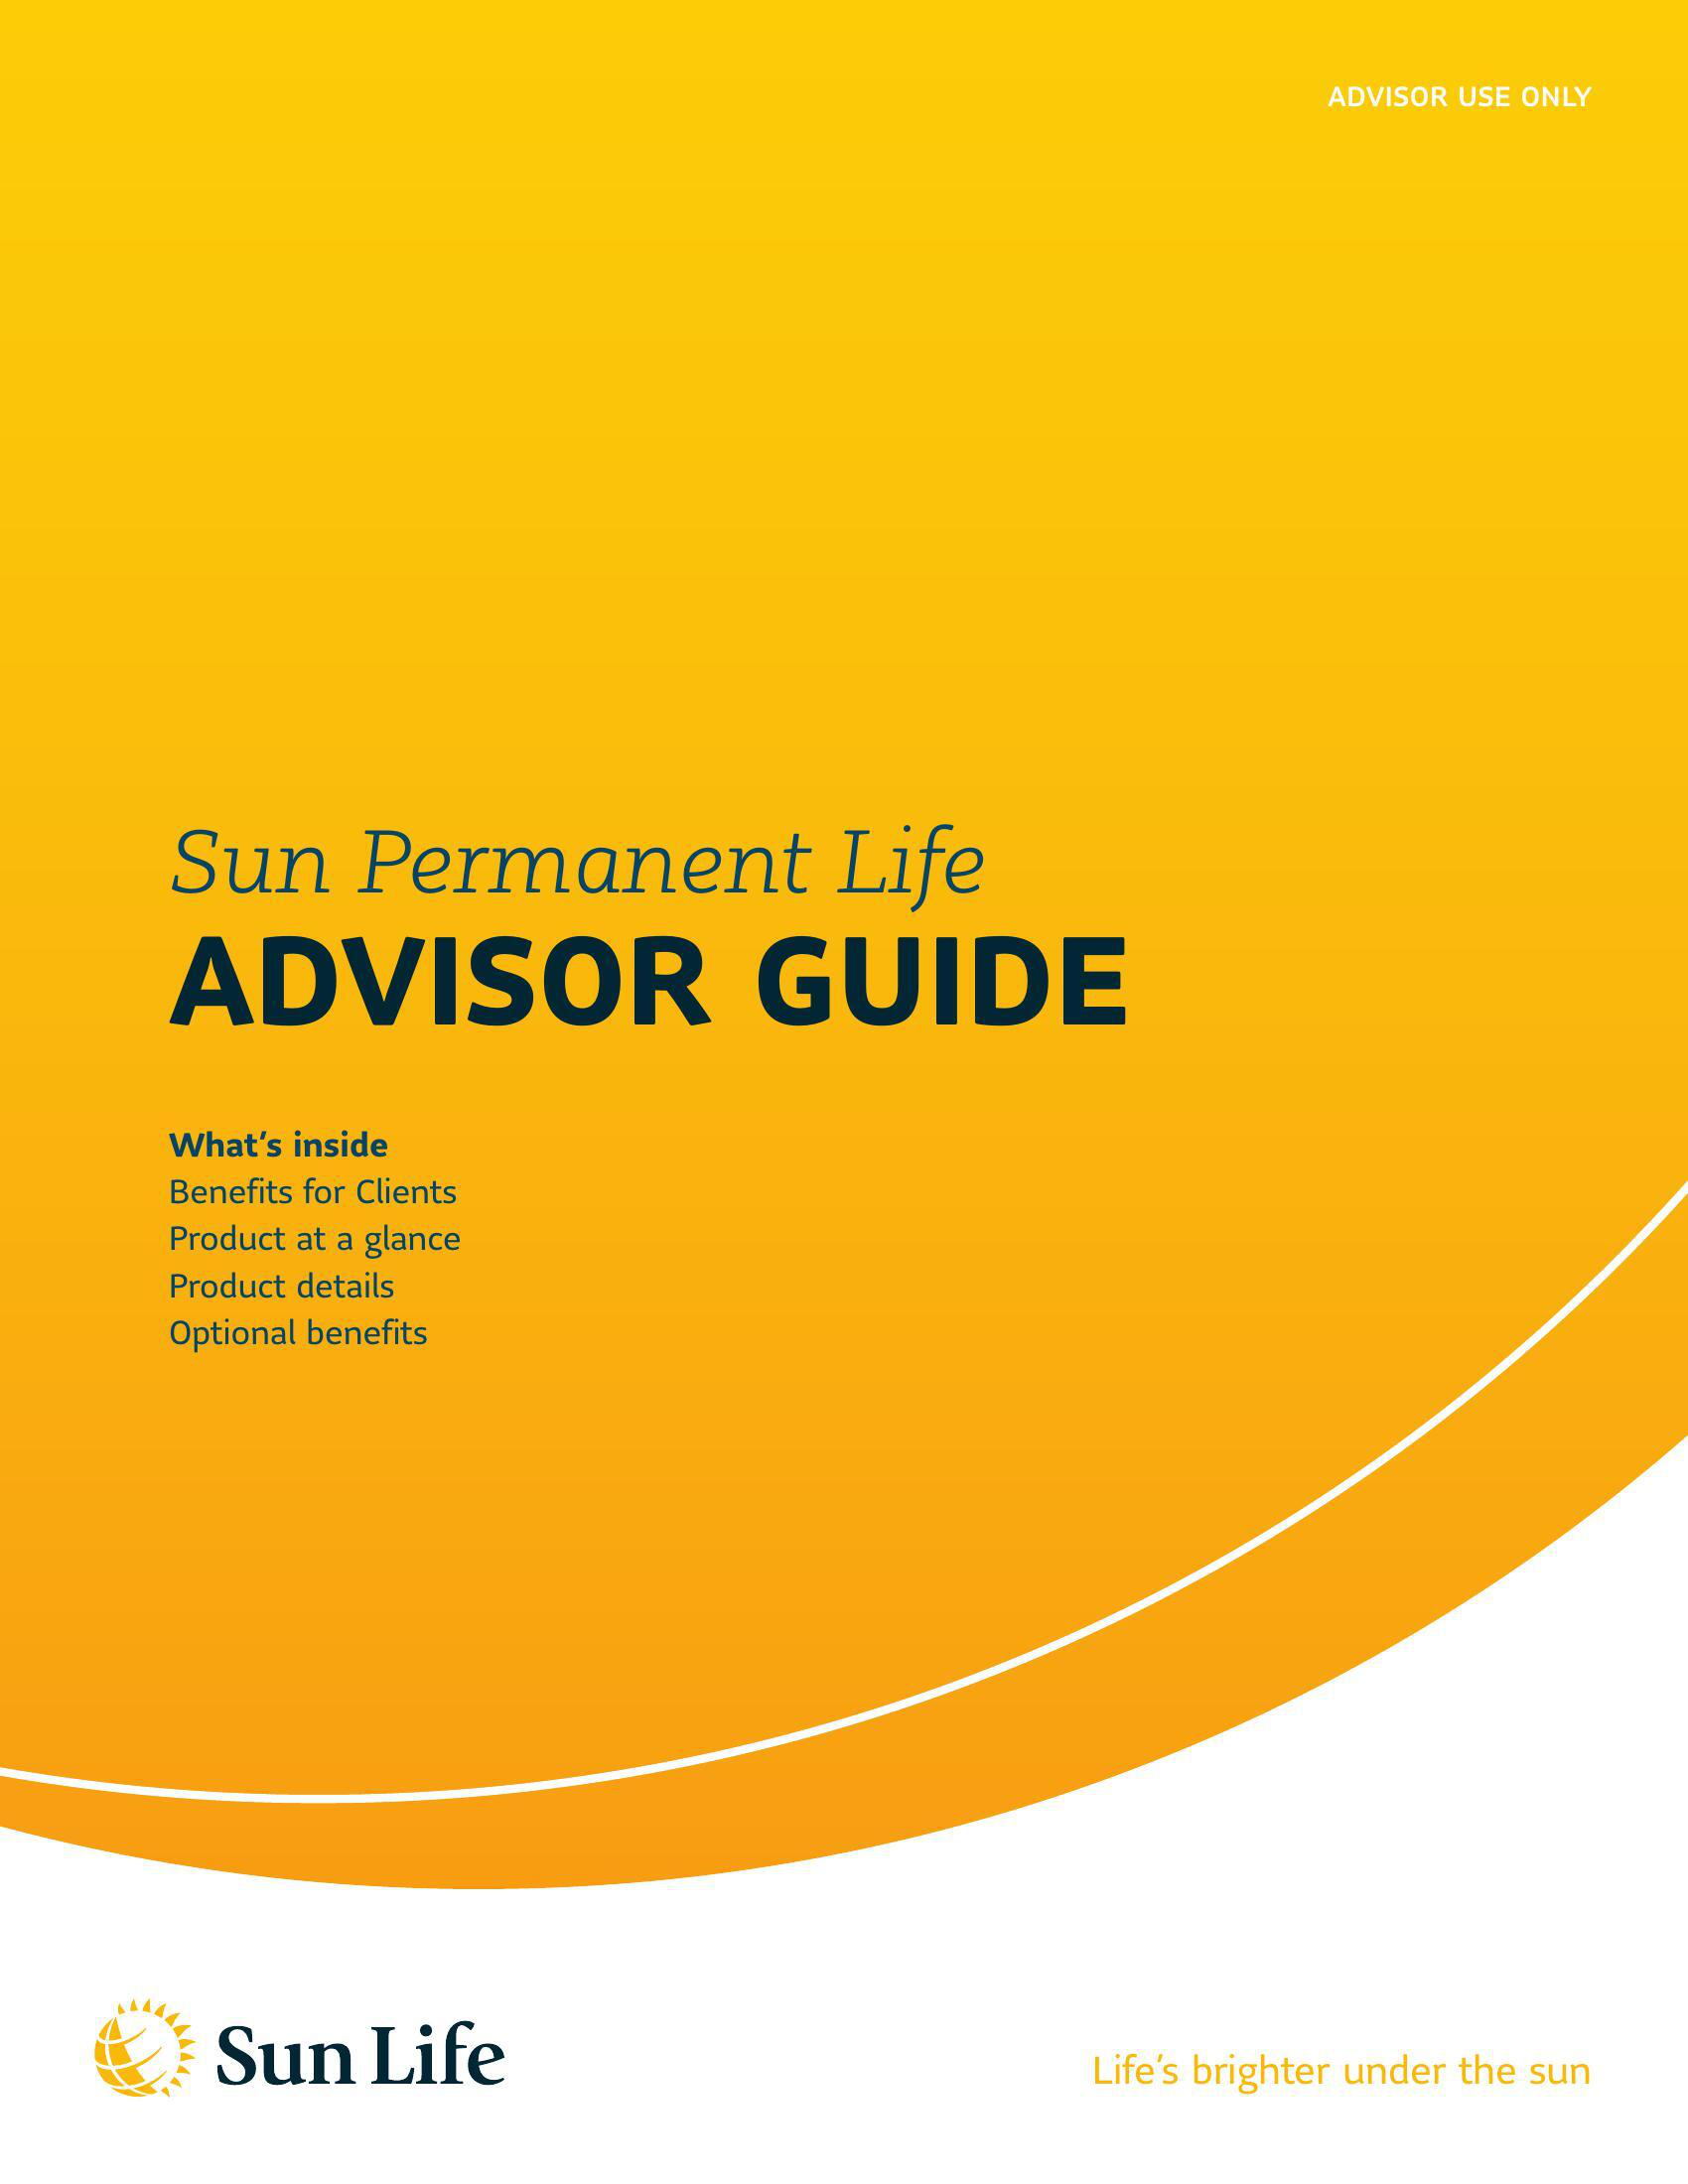

In [91]:
image = Image.open('image.jpg')
image

## Function to get dominant colors based on given image in terms of RGB using Pillow library (without using Kmeans clustering)

In [85]:
def get_dominant_color(pil_img):
    img = Image.open(pil_img)
    img.convert("RGB")
    img.resize((1, 1), resample=0)
    dominant_color = img.getpixel((1, 1))
    return dominant_color

In [86]:
get_dominant_color('image.jpg')

(253, 204, 6)

## Here I'm finding two dominat colors in an image using opencv and Kmeans clustering

In [89]:

from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS

img = 'image.jpg'
clusters = 2
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

[[254.56697225 254.45384548 253.09345624]
 [244.44152969 181.43743921  13.65474606]]


## Here is the another approach to find two dominant colors in an image using opencv and Kmeans

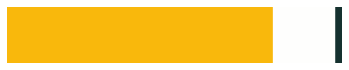

KMeans(n_clusters=3)


In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()
print(clt)